In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture

In [106]:
plt.style.use("classic")

In [107]:
data1 = pd.read_csv("cluster1.csv", header=None)
data2 = pd.read_csv("cluster2.csv", header=None)

<h1>Sub-task 2.1</h1>

In [108]:
#The function transforms a dataset to be used in graphs and models
def transfom_data(data):
    #Rotate axis
    X = data[0][:, np.newaxis]
    Y = data[1][:, np.newaxis]
    #Scale the data between 0 - 1 to account for Eucledian distance
    scaler = preprocessing.MinMaxScaler()
    #Change back to 1d array and place in series
    scaler.fit(X)
    scaled_X = pd.Series(np.rot90(scaler.transform(X))[0])

    scaler.fit(Y)
    scaled_Y = pd.Series(np.rot90(scaler.transform(Y))[0])
    #place series in dataFrame
    return X, Y, pd.DataFrame({0:scaled_X,1:scaled_Y})

In [116]:
X, Y, scaled_data = transfom_data(data1)

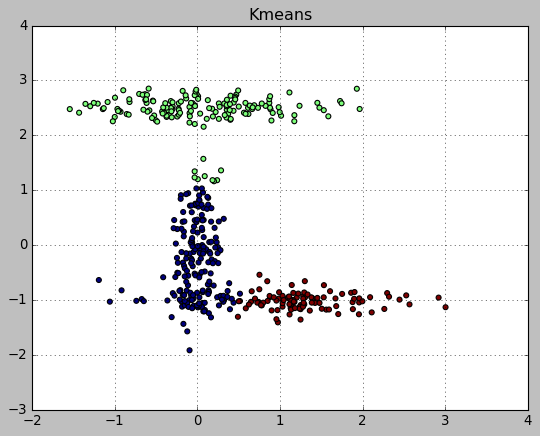

In [110]:
kmeans = KMeans(n_clusters=3)
plt.grid()
plt.title("Kmeans")
plt.scatter(X, Y, c=kmeans.fit_predict(scaled_data))

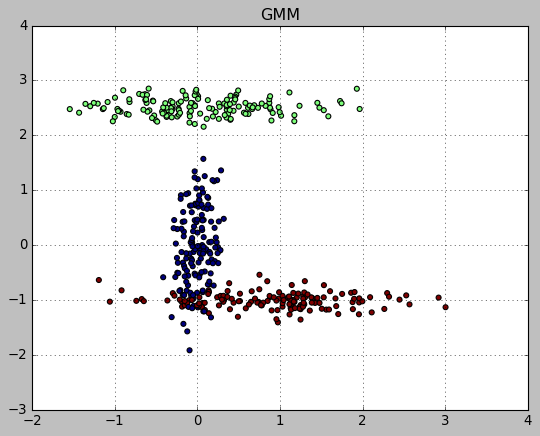

In [111]:
gmm = GaussianMixture(n_components=3)
plt.grid()
plt.title("GMM")
plt.scatter(X, Y, c=gmm.fit_predict(scaled_data))

<h2>Commentary</h2>
<p>Although there are similarities between the graphs produced by k-means and GMM clustering, differences are still noticeable. In GMM, groups overlap each other due to the algorithm fitting Gaussian graphs to the data. This happens as data situated on two or more Gaussian graphs has a probability of belonging to one of the groups. In k-means, mean points for groups are found and data is assigned to the mean point its closest too which is why overlapping is not possible. The model in the GMM graph fits data better as three Gaussians were used to generate the data.</p>

<h1>Sub-task 2.2</h1>

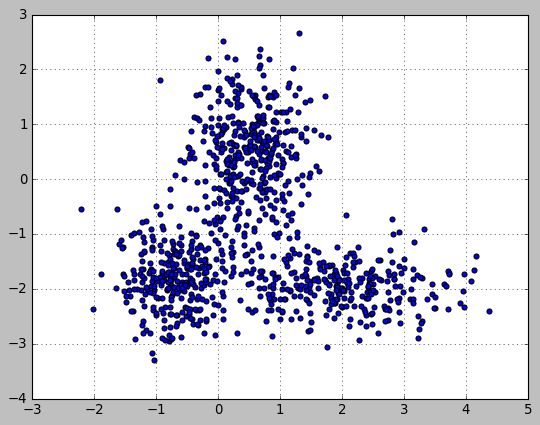

In [112]:
X, Y, scaled_data = transfom_data(data2)
plt.grid()
plt.scatter(X, Y)

In [113]:
#Table created to store model scores
table = pd.DataFrame(columns=["n_components","AIC","BIC"])
table.set_index('n_components')
#Array to store models
models = {}
#Creates a models for n components 1 to 9, stores the model in the models array and AIC and BIC scores in the table
for n in range(1,10):
    model = GaussianMixture(n_components=n).fit(scaled_data)
    models[n] = model
    table = table.append({'n_components': n,'AIC': model.aic(scaled_data),'BIC': model.bic(scaled_data)},ignore_index=True)
#Inspect table
table

,n_components,AIC,BIC
0,1.0,-740.141359,-715.602582
1,2.0,-1589.294145,-1535.308837
2,3.0,-1839.801153,-1756.369313
3,4.0,-1826.646659,-1713.768287
4,5.0,-1813.019471,-1670.694568
5,6.0,-1807.385566,-1635.614132
6,7.0,-1801.845580,-1600.627613
7,8.0,-1789.018567,-1558.354069
8,9.0,-1785.398176,-1525.287146


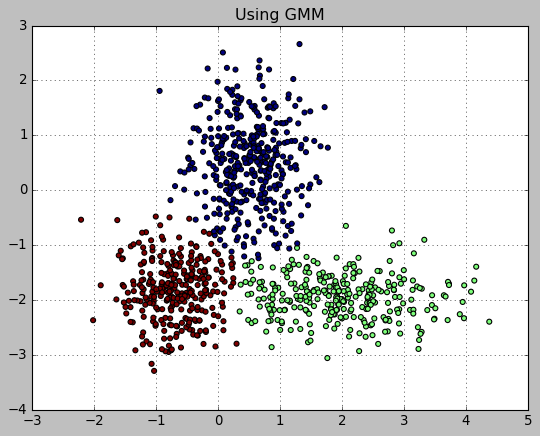

In [114]:
#The most appropriate model is used
plt.grid()
plt.title("Using GMM")
plt.scatter(X, Y, c=models[3].predict(scaled_data))

<h2>Commentary</h2>

<p>Firstly, I plotted the data onto a scatter graph to examine it. I did not notice any distinct groups as the data looked mixed together. Due to no distinct groups seen, I went with a soft clustering approach by using GMM. Unlike the first task I did not know how many clusters to apply so I created 9 models using 9 different Gaussians then returned their AIC and BIC values. The AIC and BIC are mathematical methods used to determine how well a model fits the data. The results showed using 3 Gaussians produced the lowest AIC and BIC scores. Therefore, this was the best model as it was able to strike a balance between that fit and the number of parameters that were used.</p>